### Galaxies Data Analysis & Prediction Modeling

### Data Description
The data contains 80 variables that characterize the demographic and socio-economic situation of 181 galaxies over a period of at most 26 years. A composite index is given that measures their well-being. However, the demographic and socio-economic variables that influence this index is not known. We seek to determine, what makes the galaxies better off?

#### Defining the question
1. Tell us which variables best explain the variance of the well-being index
2. Determine the future well-being values of the galaxies

### Metric for Success
1. Come up with a model that will be used to predict the future well-being index values of galaxies.
2. Test the model using the RMSE Metric. The lower the RMSE score, the more accurate the model.
3. Predict the future well being index values using the provided validation dataset.

### Experimental Design
Import necessary libraries

Import dataset

Exploring data

Data cleaning

1. Checking & handling missing values
2. Checking for duplicates
3. Checking for outliers

EDA

1. Checking the distribution of the features
2. Multivariate analysis
3. Variance Threshold

Modelling

1. Linear Regression
2. Lasso Regression
3. Ridge Regression

Validating the model

By fitting the most accurate model into our cleaned validation data.

### Data Relevance

Check for data relevance by checking the columns with null values and selecting the columns which contained missing values that were less than 30 %, which were only 12 columns. The rest of the columns had too many missing values which would not really be relevant when trying to fit our models because they contained very little information.


### Importing the libraries

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

### Loading the dataset

In [179]:
## df is the train data
df = pd.read_csv("C:\\Users\\Wangari Kimani\\Documents\\MSc DSA\\FCC\\PRACTICE\\Ilab_Test\\Data\\Train_data.csv",index_col = 0)
df.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15â€“64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15â€“24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10065,1002001,Antlia B,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,0.471400,247.196654,33.135

### Exploring the data

In [180]:
## Setting to display all columns and all rows
pd.set_option('display.max_rows', None, 'display.max_columns',None)
df.head() # Check the first 5 rows


,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15â€“64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15â€“24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10065,1002001,Antlia B,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,0.471400,247.196654,33.135

In [181]:
# Check the last 5 rows
df.tail()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15â€“64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15â€“24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
993066,1006009,NGC 1560,0.937222,84.487688,24971.04485,0.911724,11.789837,9.783680,0.848086,0.850300,NaN,100.768228,

In [182]:
df.shape

(3097, 80)

##### The data has 3097 rows and 80 columns

In [183]:
df.columns # Checking the columns in the dataset

Index(['galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       'Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15â€“64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Life expe

In [184]:
## Checking the statistics description
df.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15â€“64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15â€“24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
count,3.097000e+03,3096.000000,3096.000000,3069.000000,3069.000000,2968.000000,2742.000000,2716.000000,2716.000000,2678.000000,1286.000000,1282.000000,869.000000,693.000000,693.000000,693.000000,681.000000,

In [185]:
## Checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3097 entries, 10065 to 998085
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            3097 non-null   int64  
 1   galaxy                                                                                   3097 non-null   object 
 2   existence expectancy index                                                               3096 non-null   float64
 3   existence expectancy at birth                                                            3096 non-null   float64
 4   Gross income per capita                                                                  3069 non-null   float64
 5   Income Index                                            

### Cleaning the data

In [186]:
## Checking for missing values
df.isnull().sum()

galactic year                                                                                 0
galaxy                                                                                        0
existence expectancy index                                                                    1
existence expectancy at birth                                                                 1
Gross income per capita                                                                      28
Income Index                                                                                 28
Expected years of education (galactic years)                                                129
Mean years of education (galactic years)                                                    355
Intergalactic Development Index (IDI)                                                       381
Education Index                                                                             381
Intergalactic Development Index (IDI), R

In [187]:
## Checking the percentage of missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Current health expenditure (% of GGP),2789,0.900549
"Interstellar Data Net users, total (% of population)",2788,0.900226
Interstellar phone subscriptions (per 100 people),2780,0.897643
"Respiratory disease incidence (per 100,000 people)",2776,0.896351
Gender Inequality Index (GII),2740,0.884727
"Intergalactic Development Index (IDI), male, Rank",2719,0.877946
Private galaxy capital flows (% of GGP),2718,0.877624
"Intergalactic Development Index (IDI), female, Rank",2718,0.877624
Gender Development Index (GDI),2710,0.875040
"Intergalactic Development Index (IDI), male",2709,0.874717


##### From the above observations, we can see that there are quite a number of columns with alot of missing values. I opted to drop the ones with missing values above 30%, since already a huge chunk of information is missing and that would not be helpful in our analysis.

In [188]:
df = df.drop((missing_data[missing_data['Percent'] > 0.3]).index,1)
df.isnull().sum() 

C:\Users\Wangari Kimani\AppData\Local\Temp\ipykernel_26436\1832572953.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop((missing_data[missing_data['Percent'] > 0.3]).index,1)


galactic year                                     0
galaxy                                            0
existence expectancy index                        1
existence expectancy at birth                     1
Gross income per capita                          28
Income Index                                     28
Expected years of education (galactic years)    129
Mean years of education (galactic years)        355
Intergalactic Development Index (IDI)           381
Education Index                                 381
Intergalactic Development Index (IDI), Rank     419
Well-Being Index                                  0
dtype: int64

#### Dealing with missing values

In [189]:
df2 = df[['galactic year', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Well-Being Index']]

In [190]:
df2.isnull().sum() # Checking for missing values

galactic year                                     0
existence expectancy index                        1
existence expectancy at birth                     1
Gross income per capita                          28
Income Index                                     28
Expected years of education (galactic years)    129
Mean years of education (galactic years)        355
Intergalactic Development Index (IDI)           381
Education Index                                 381
Intergalactic Development Index (IDI), Rank     419
Well-Being Index                                  0
dtype: int64

In [191]:
## Using median to fill the missing values for existence expectancy index & existence expectancy at birth
df2['existence expectancy index'].fillna(df2['existence expectancy index'].median(),inplace = True)
df2['existence expectancy at birth'].fillna(df2['existence expectancy at birth'].median(),inplace = True)

C:\Users\Wangari Kimani\AppData\Local\Temp\ipykernel_26436\721779459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['existence expectancy index'].fillna(df2['existence expectancy index'].median(),inplace = True)
C:\Users\Wangari Kimani\AppData\Local\Temp\ipykernel_26436\721779459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['existence expectancy at birth'].fillna(df2['existence expectancy at birth'].median(),inplace = True)


In [192]:
## Using forward fill to fill in missing values for Gross income per capita & Income Index
df2['Gross income per capita'] = df2['Gross income per capita'].fillna(method = 'ffill')
df2['Income Index'] = df2['Income Index'].fillna(method = 'ffill')

C:\Users\Wangari Kimani\AppData\Local\Temp\ipykernel_26436\1849293043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Gross income per capita'] = df2['Gross income per capita'].fillna(method = 'ffill')
C:\Users\Wangari Kimani\AppData\Local\Temp\ipykernel_26436\1849293043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Income Index'] = df2['Income Index'].fillna(method = 'ffill')


In [193]:
## Using knn imputer to fill out the rest of the missing values

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

df2 = pd.DataFrame(imputer.fit_transform(df2),columns = df2.columns)

In [194]:
df2.isnull().sum() # Confirming there are no more missing values

galactic year                                   0
existence expectancy index                      0
existence expectancy at birth                   0
Gross income per capita                         0
Income Index                                    0
Expected years of education (galactic years)    0
Mean years of education (galactic years)        0
Intergalactic Development Index (IDI)           0
Education Index                                 0
Intergalactic Development Index (IDI), Rank     0
Well-Being Index                                0
dtype: int64

In [195]:
df2.shape

(3097, 11)

#### Our new data has 3097 rows and 11 columns

In [196]:
df2.duplicated().any() # Checking for duplicates

False

#### There are no duplicates in the data

#### Checking for Outliers

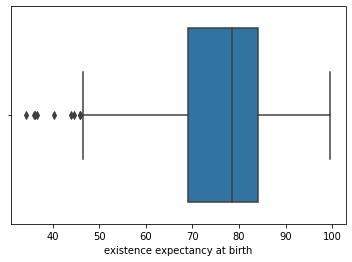

In [197]:
## Checking for outliers in the existence expectancy at birth column
sns.boxplot(data = df2, x = 'existence expectancy at birth');

##### There seems to be outliers in the column that fall below 45

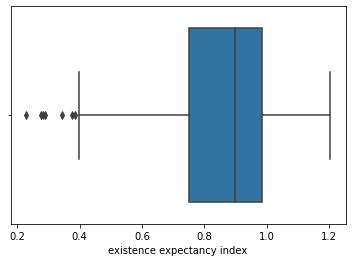

In [198]:
## Checking for outliers in the existence expectancy index column
sns.boxplot(data = df2, x = 'existence expectancy index');

##### There are a few outliers in the existence expectancy index feature that fall below 0.4 level

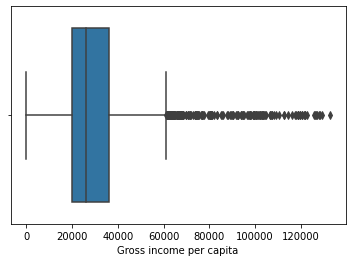

In [199]:
## Checking for outliers in the Gross income per capita column
sns.boxplot(data = df2, x = 'Gross income per capita');

#### There are outliers in the gross income per capita feature that are above 60000

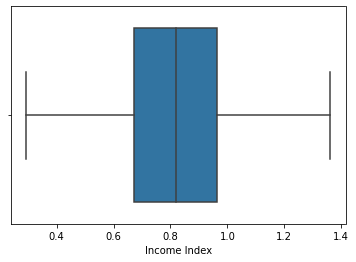

In [200]:
## Checking for outliers in the Income Index column
sns.boxplot(data = df2, x = 'Income Index');

#### The Income Index doesn't contain any outliers

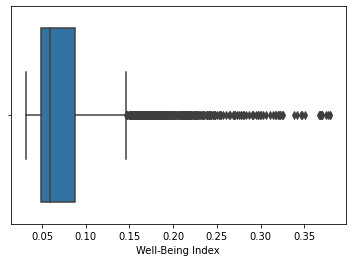

In [201]:
## Checking for outliers in the Well-Being Index column
sns.boxplot(data = df2, x = 'Well-Being Index');

#### There seem to be outliers in the well being index above 0.15

### EDA

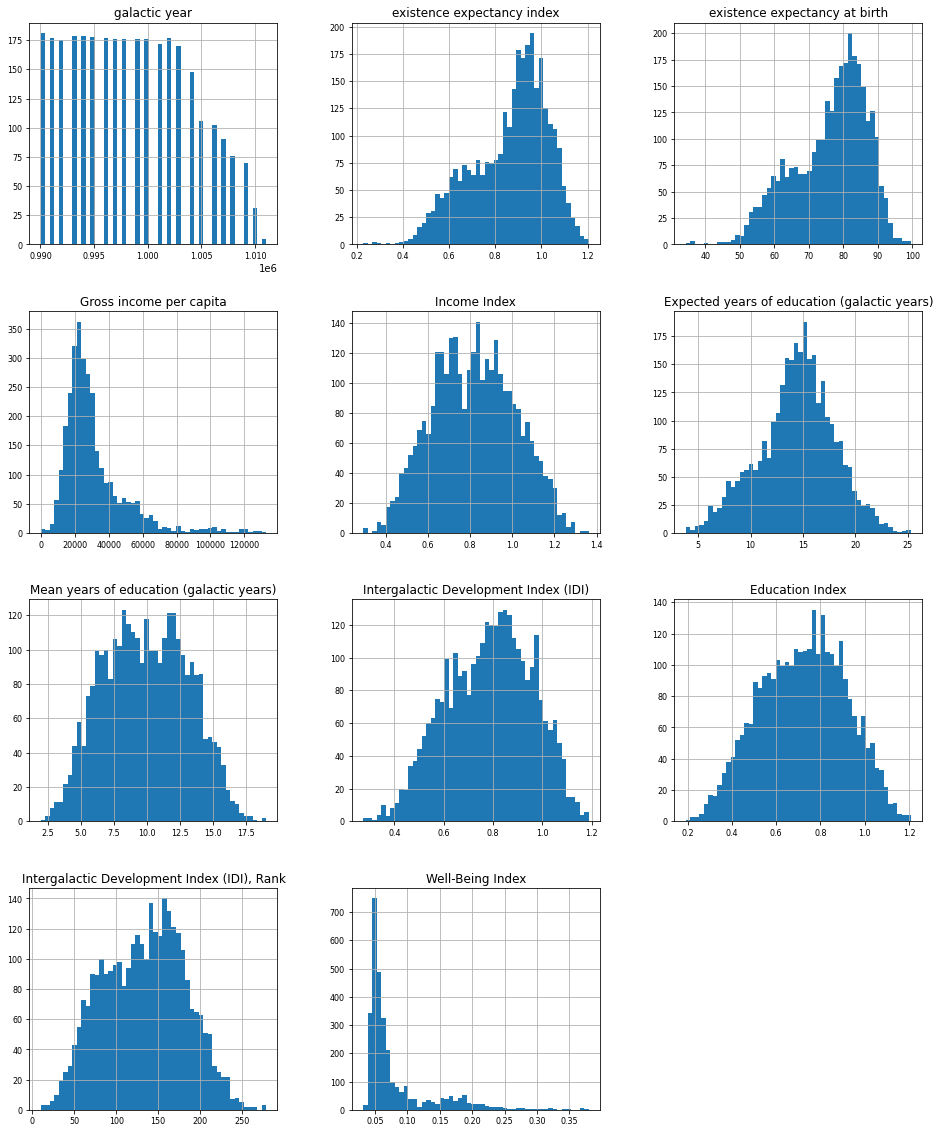

In [202]:
## Creating a histogram to see the distribution of our features.
df2.hist(figsize = (16,20), bins=50, xlabelsize=8, ylabelsize=8);

##### Existance expectance index and Existance expectance at birth are both skewed to the left with the same distribution.
##### Gross income per capita and well being index are skewed to the right.
##### Income index, Education index, Intergalactic Development Index(IDI), Expected years of education (galactic years), Mean years of education (galactic years), Intergalactic Development Index (IDI) and Income index have similar distributions, which appear to be normal distributions.


### Multivariate Analysis

#### Correlation between the variables and the Well-Being Index

In [204]:
## Find correlation in variables
df2.corr().head()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Well-Being Index
galactic year,1.000000,0.132724,0.129802,0.081354,0.091205,0.251572,0.201409,0.166106,0.238906,0.149950,0.016315
existence expectancy index,0.132724,1.000000,0.910616,0.487670,0.717641,0.707087,0.628709,0.773469,0.665388,-0.700066,0.584474
existence expectancy at birth,0.129802,0.910616,1.000000,0.496712,0.723205,0.707071,0.629168,0.781239,0.671927,-0.703448,0.587835
Gross income per capita,0.081354,0.487670,0.496712,1.000000,0.733875,0.479554,0.457720,0.616477,0.498348,-0.630726,0.504044
Income Index,0.091205,0.717641,0.723205,0.733875,1.000000,0.709238,0.633914,0.810695,0.689206,-0.769924,0.605023


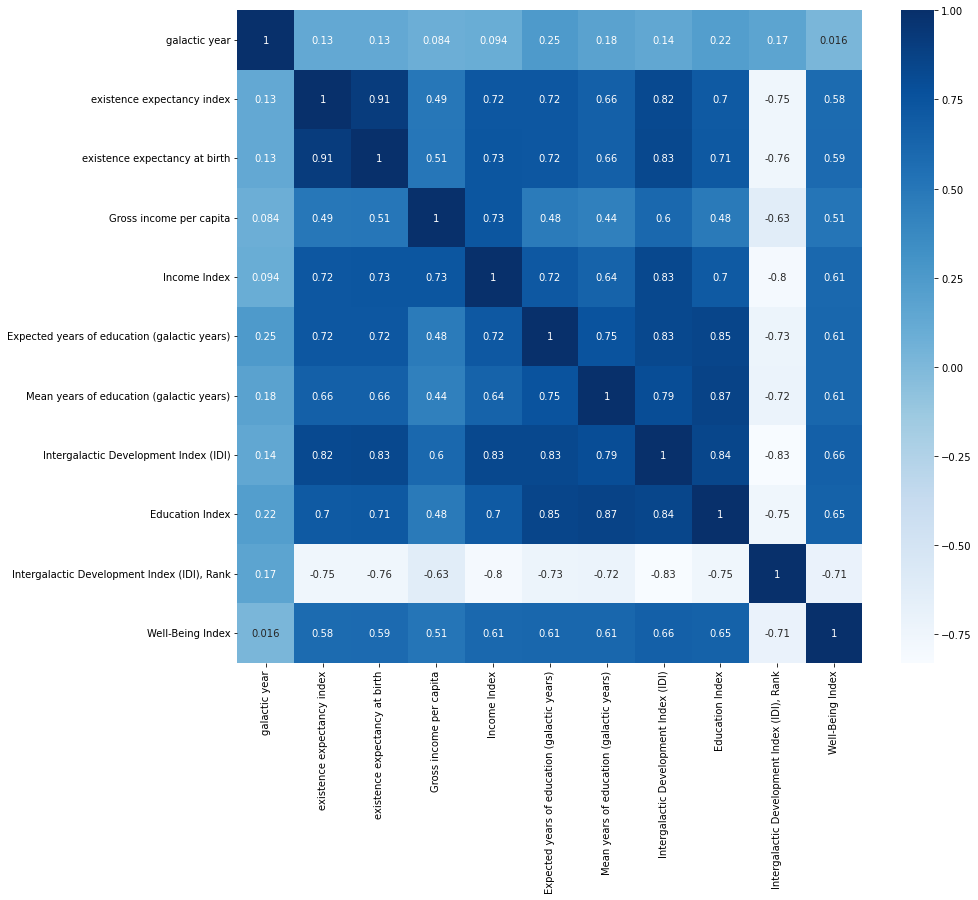

In [205]:
# Plotting a heat map
plt.figure(figsize = (14,12))
cor = df.corr()
sns.heatmap(cor,annot = True, cmap = plt.cm.Blues)
plt.show;

#### Checking the features that are correlated with our predicted variable, Well-Being Index

In [206]:
#Correlation with the output variable
cor_target = abs(cor['Well-Being Index'])
print(cor_target)

galactic year                                   0.016315
existence expectancy index                      0.584568
existence expectancy at birth                   0.587930
Gross income per capita                         0.507892
Income Index                                    0.606666
Expected years of education (galactic years)    0.611651
Mean years of education (galactic years)        0.611781
Intergalactic Development Index (IDI)           0.661725
Education Index                                 0.645374
Intergalactic Development Index (IDI), Rank     0.705557
Well-Being Index                                1.000000
Name: Well-Being Index, dtype: float64


In [207]:
#Selecting the highly correlated features
relevant_features = cor_target[cor_target>=0.5]
relevant_features

existence expectancy index                      0.584568
existence expectancy at birth                   0.587930
Gross income per capita                         0.507892
Income Index                                    0.606666
Expected years of education (galactic years)    0.611651
Mean years of education (galactic years)        0.611781
Intergalactic Development Index (IDI)           0.661725
Education Index                                 0.645374
Intergalactic Development Index (IDI), Rank     0.705557
Well-Being Index                                1.000000
Name: Well-Being Index, dtype: float64

### Checking the Variance Threshold of the Features

In [208]:
df2.columns

Index(['galactic year', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank', 'Well-Being Index'],
      dtype='object')

In [209]:
# import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
var_threshold = VarianceThreshold(threshold=0)   # threshold = 0 for constant
  
# fit the data
var_threshold.fit(df2)
  
# We can check the variance of different features against the variance of the well being index, which is 0.
print(var_threshold.variances_)

[2.10050000e+04 2.70743299e-02 6.53498434e+01 1.32988449e+05
 3.77349585e-02 1.28311850e+01 1.00929343e+01 2.95727226e-02
 3.75293975e-02 2.68860707e+02 3.13654116e-03]


### Modelling

### Model 1. Linear Regression

In [210]:
## Importing the necessary libraries
from sklearn import linear_model
from sklearn import datasets, linear_model, metrics
from sklearn import metrics
import math

In [211]:
df2.columns

Index(['galactic year', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank', 'Well-Being Index'],
      dtype='object')

In [212]:
# setting the x and y variables for the train data
X = df2[['galactic year', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank']]
y = df2['Well-Being Index']

In [213]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
                                                    

In [214]:
# create linear regression object
reg = linear_model.LinearRegression()

In [215]:
## Fitting a linear regression model to our train data
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [-3.84966151e-07  1.50159604e-02  4.44093894e-04  2.83714843e-07
  9.44822677e-04  1.82648005e-03  2.19849938e-03 -2.51511583e-02
  2.97388461e-02 -3.87573189e-04]
Variance score: 0.5147127395672326


In [216]:
y_pred = reg.predict(X)
print(y_pred)

[-0.00287028  0.09076706  0.12886367 ...  0.09015104  0.02001334
  0.02302702]


In [217]:
## Model Evaluation
#print result RMSE
print (np.sqrt(metrics.mean_squared_error(y, y_pred)))

0.03842908220489801


### Model 2. Lasso Regression

In [218]:
## Importing the necessary libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [219]:
## Fitting a lasso regression model to our train data
lasso_model = Lasso().fit(X_train,y_train)

In [220]:
## Getting the intercept for the lasso model
lasso_model.intercept_

0.44521647402780584

In [221]:
## Getting the coefficient for the lasso model
lasso_model.coef_

array([-4.08949682e-07,  0.00000000e+00,  0.00000000e+00,  1.44979659e-06,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00])

In [222]:
# Predictions
lasso_model.predict(X_train)[:5]

array([0.07348887, 0.07372761, 0.06009018, 0.12912877, 0.05664592])

In [223]:
lasso_model.predict(X_test)[:5]

array([0.06306545, 0.0657867 , 0.06140538, 0.07067825, 0.0578603 ])

In [224]:
y_pred = lasso_model.predict(X)
## Obtaining the RMSE score of the lasso model
np.sqrt(mean_squared_error(y,y_pred))

0.04838327257109511

### Model 3. Ridge Regression

In [225]:
## Fitting a ridge regression model to our train data
ridge_model = Ridge(alpha = 5).fit(X_train, y_train)

In [226]:
## Getting the coefficient for the ridge model
ridge_model.coef_

array([-3.68124093e-07,  9.35065774e-03,  4.78990007e-04,  2.76159724e-07,
       -1.72309570e-04,  1.91922976e-03,  2.33931856e-03, -1.49557283e-02,
        2.03855040e-02, -3.88150743e-04])

In [227]:
## Getting the intercept for the ridge model
ridge_model.intercept_

0.3944416090088014

In [228]:
ridge_model = Ridge().fit(X_train, y_train)

In [229]:
# Predictions
y_pred = ridge_model.predict(X_train)
y_pred

array([0.09647582, 0.11436118, 0.06898017, ..., 0.11950594, 0.0113322 ,
       0.04022963])

In [230]:
## Evaluating the model
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

0.03702374311033586

#### From the 3 models, we can see that the ridge model provides the lowest RMSE value of 0.03702374311033586 out of the other models. So we can use the ridge model to predict our index variable in the validation data.

### Validation Data

In [231]:
## Loading the validation data
data = pd.read_csv("C:\\Users\\Wangari Kimani\\Documents\\MSc DSA\\FCC\\PRACTICE\\Ilab_Test\\Data\\Validation.csv")
data.head()

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15â€“64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15â€“24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Predicted Well-Being Index
0,886447,1004004,Andromeda Galaxy (M31),0.803915,82.718434,17299.57148,0.691448,16.083635,11.282011,0.715746,0.745786,191.852274,70.135059,65.908117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Cleaning the Validation data

In [232]:
## Checking for any missing values
data.isnull().sum()

ID                                                                                           0
galactic year                                                                                0
galaxy                                                                                       0
existence expectancy index                                                                   0
existence expectancy at birth                                                                0
Gross income per capita                                                                      0
Income Index                                                                                 0
Expected years of education (galactic years)                                                 0
Mean years of education (galactic years)                                                     3
Intergalactic Development Index (IDI)                                                        3
Education Index                                   

In [233]:
## Checking the percentage of missing values
Total_Count = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Current health expenditure (% of GGP),2789.0,0.230556
"Interstellar Data Net users, total (% of population)",2788.0,0.226389
Interstellar phone subscriptions (per 100 people),2780.0,0.211111
"Respiratory disease incidence (per 100,000 people)",2776.0,0.209722
Gender Inequality Index (GII),2740.0,0.331944
"Intergalactic Development Index (IDI), male, Rank",2719.0,0.297222
Private galaxy capital flows (% of GGP),2718.0,0.319444
"Intergalactic Development Index (IDI), female, Rank",2718.0,0.297222
Gender Development Index (GDI),2710.0,0.279167
"Intergalactic Development Index (IDI), male",2709.0,0.279167


In [234]:
## Selecting our useful columns
data2 = data[['ID','galactic year', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Predicted Well-Being Index']]
data2.head(20) # Viewing the first 20 rows

,ID,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Predicted Well-Being Index
0,886447,1004004,0.803915,82.718434,17299.57148,0.691448,16.083635,11.282011,0.715746,0.745786,191.852274,NaN
1,687564,1005006,0.860011,73.682279,24971.71631,0.669550,12.858577,10.493260,0.727915,0.806982,172.983630,NaN
2,494935,1006009,0.810644,68.456526,15943.82977,0.766118,14.236676,9.962169,0.757072,0.852921,180.488519,NaN
3,378919,1015056,0.837170,68.742404,20952.63665,0.757196,14.281498,10.329880,0.759207,0.801123,186.040542,NaN
4,421878,1004004,0.749034,72.093220,30068.14043,0.641228,12.510524,7.132999,0.673619,0.528564,155.296209,NaN
5,949719,1005006,0.780314,73.260852,25518.34111,0.671947,12.523339,7.038226,0.707992,0.503933,209.703246,NaN
6,898972,1006009,0.831231,69.147214,22288.24338,0.668888,12.192083,7.568960,0.698053,0.484680,187.213164,NaN
7,375574,1015056,0.930855,76.370616,20793.51589,0.786066,15.177870,6.669020,0.688784,0.685114,190.121677,NaN
8,569844,1011030,1.098514,88.471310,45907.88815,1.000711,21.368570,13.781150,1.005822,1.166783,76.471863,NaN
9,654472,1012036,1.070749,87.149509,30312.89463,1.043580,20.890412,12.632184,1.022990,1.010856,76.519302,NaN


In [235]:
data2.shape# Checking the rows and columns in the validation data

(720, 12)

In [236]:
data2.isnull().sum()# Checking the columns with missing values

ID                                                0
galactic year                                     0
existence expectancy index                        0
existence expectancy at birth                     0
Gross income per capita                           0
Income Index                                      0
Expected years of education (galactic years)      0
Mean years of education (galactic years)          3
Intergalactic Development Index (IDI)             3
Education Index                                   3
Intergalactic Development Index (IDI), Rank       7
Predicted Well-Being Index                      720
dtype: int64

#### Dealing with the missing values

In [237]:
## Using median to fill the columns containing missing values with their respective medians
data2['Mean years of education (galactic years)'].fillna(data2['Mean years of education (galactic years)'].median(),inplace = True)
data2['Intergalactic Development Index (IDI)'].fillna(data2['Intergalactic Development Index (IDI)'].median(),inplace = True)
data2['Education Index'].fillna(data2['Education Index'].median(),inplace = True)
data2['Intergalactic Development Index (IDI), Rank'].fillna(data2['Intergalactic Development Index (IDI), Rank'].median(),inplace = True)


C:\Users\Wangari Kimani\AppData\Local\Temp\ipykernel_26436\3963815806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Mean years of education (galactic years)'].fillna(data2['Mean years of education (galactic years)'].median(),inplace = True)
C:\Users\Wangari Kimani\AppData\Local\Temp\ipykernel_26436\3963815806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Intergalactic Development Index (IDI)'].fillna(data2['Intergalactic Development Index (IDI)'].median(),inplace = True)
C:\Users\Wangari Kimani\AppData\Local\Temp\ipykernel_26436\3963815806.py:4: SettingWithCopyWarning: 
A value is trying to be

In [238]:
## Defining our X and Y variables used in fitting the model
X_train = data2[['galactic year', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank']]
y_train =data2['Predicted Well-Being Index']

In [239]:
## Predicting our y variable 
y_pred = ridge_model.predict(X_train)

y_pred

array([ 6.37267860e-02,  6.31173475e-02,  5.62708548e-02,  5.20142550e-02,
        5.50467442e-02,  3.16425542e-02,  3.81503089e-02,  4.70099712e-02,
        1.40948764e-01,  1.27133400e-01,  1.37644021e-01,  1.39440116e-01,
        1.36245089e-01,  1.23991229e-01,  1.27981410e-01,  1.25790198e-01,
        1.27229603e-01,  1.41152133e-01,  1.28058105e-01,  1.29756712e-01,
        1.45441230e-01,  1.53006665e-01,  1.31240700e-01,  1.51357216e-01,
        3.29242102e-02,  3.80457929e-02,  2.12398351e-02,  3.40531122e-02,
        4.16341010e-02,  4.29624193e-02,  4.42561831e-02,  4.06453710e-02,
        1.82875628e-02,  3.53265179e-02,  2.48328935e-02,  4.01753023e-02,
        8.58976909e-02,  6.68494582e-02,  6.91943802e-02,  7.44467460e-02,
        1.25694324e-01,  1.44135565e-01,  1.25033235e-01,  1.40123794e-01,
        1.41821258e-01,  1.41470718e-01,  1.48565022e-01,  1.48869606e-01,
        6.28005841e-02,  1.85910956e-02,  1.82223268e-02,  2.23490085e-02,
        6.81346140e-02,  

In [240]:
## Connecting our ID column and the predicted column
label =[data['ID'],y_pred]
label

[0      886447
 1      687564
 2      494935
 3      378919
 4      421878
 5      949719
 6      898972
 7      375574
 8      569844
 9      654472
 10     101940
 11     153843
 12     381662
 13     624052
 14     939375
 15     164310
 16     900632
 17     175032
 18     867872
 19     256577
 20     288496
 21     618381
 22     231901
 23     179358
 24     192005
 25     298577
 26     942058
 27     470561
 28     325435
 29     957155
 30     179606
 31     589467
 32     950555
 33     877326
 34     244798
 35     372861
 36     990512
 37     362014
 38     285518
 39     396661
 40     909004
 41     835410
 42     668839
 43     197160
 44     477910
 45     127790
 46     278551
 47     355696
 48     219016
 49     165043
 50     490373
 51     855980
 52     938424
 53     647622
 54     119825
 55     156794
 56     923580
 57     487140
 58     866086
 59     452935
 60     169028
 61     580970
 62     955095
 63     941913
 64     245773
 65     193213
 66     81

In [241]:
## Creating a new dataframe containing the ID and the Predicted well-being variable
df_result = pd.DataFrame(label)
df_result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719
ID,886447.000000,687564.000000,494935.000000,378919.000000,421878.000000,949719.000000,898972.00000,375574.00000,569844.000000,654472.000000,101940.000000,153843.00000,381662.000000,624052.000000,939375.000000,164310.00000,900632.00000,175032.000000,867872.000000,256577.000000,288496.000000,618381.000000,231901.000000,179358.000000,192005.000000,298577.000000,942058.00000,470561.000000,325435.000000,957155.000000,179606.000000,589467.000000,950555.000000,877326.000000,244798.000000,372861.000000,990512.000000,362014.000000,285518.000000,396661.000000,909004.000000,835410.000000,668839.000000,197160.000000,477910.000000,127790.000000,278551.000000,355696.00000,219016.000000,165043.000000,490373.000000,855980.000000,938424.000000,647622.000000,119825.000000,156794.000000,923580.000000,487140.000000,866086.000000,452935.000000,169028.000000,580970.000000,955095.000000,941913.000000,245773.000000,193213.000000,819526.000000,217776.000000,967306.000000,175117.000000,839729.000000,820458.000000,106612.000000,494836.000000,120162.000000,324312.000000,97466.000000,215356.000000,652733.000000,247966.000000,400311.00000,519043.000000,450315.00000,127267.000000,538837.000000,158925.000000,110538.000000,595603.000000,6674

In [242]:
## Transposing our new dataframe
Results = df_result.transpose()
Results.head()

,ID,Unnamed 0
0,886447.0,0.063727
1,687564.0,0.063117
2,494935.0,0.056271
3,378919.0,0.052014
4,421878.0,0.055047


In [243]:
## Renaming the unnamed column
Results.rename(columns = {'Unnamed 0':'Predicted well-being Index'}, inplace = True)
Results.head()

,ID,Predicted well-being Index
0,886447.0,0.063727
1,687564.0,0.063117
2,494935.0,0.056271
3,378919.0,0.052014
4,421878.0,0.055047


In [245]:
## Saving our new dataframe to a csv file
Results.to_csv('Wangari_Kimani.csv')